In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings

from datetime import datetime
sns.set()

### Importing the Data

In [2]:
raw_csv_data = pd.read_csv('data/BTC-USD.csv')
btc_data = raw_csv_data.copy()

In [3]:
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
btc_data = btc_data[['Date', 'Close', 'Volume']]

### Examining the Data

In [5]:
btc_data

,Date,Close,Adj Close,Volume
0,2014-09-17,457.334015,457.334015,21056800
1,2014-09-18,424.440002,424.440002,34483200
2,2014-09-19,394.795990,394.795990,37919700
3,2014-09-20,408.903992,408.903992,36863600
4,2014-09-21,398.821014,398.821014,26580100
...,...,...,...,...
2798,2022-05-16,29862.917969,29862.917969,32613897286
2799,2022-05-17,30425.857422,30425.857422,29101473475
2800,2022-05-18,28720.271484,28720.271484,31285268319
2801,2022-05-19,30314.333984,30314.333984,33773447707


In [6]:
btc_data.describe()

,Close,Adj Close,Volume
count,2803.000000,2803.000000,2.803000e+03
mean,12225.922527,12225.922527,1.518804e+10
std,16626.687826,16626.687826,1.995533e+10
min,178.102997,178.102997,5.914570e+06
25%,618.057495,618.057495,8.362465e+07
50%,6480.379883,6480.379883,5.500810e+09
75%,11207.221680,11207.221680,2.590351e+10
max,67566.828125,67566.828125,3.509679e+11


In [7]:
btc_data.isna()

,Date,Close,Adj Close,Volume
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2798,False,False,False,False
2799,False,False,False,False
2800,False,False,False,False
2801,False,False,False,False


In [8]:
btc_data.Close.isna().sum()

0

### Plotting the Data

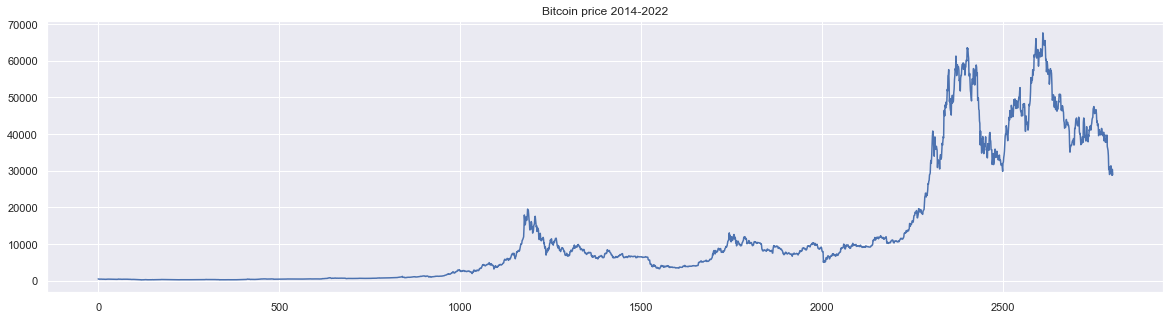

In [9]:
btc_data.Close.plot(figsize=(20,5), title= 'Bitcoin price 2014-2022');

### The QQ Plot
Quantile-quantile: to determine whether data is distributed in a Normal distribution.

In [10]:
import scipy.stats
import pylab

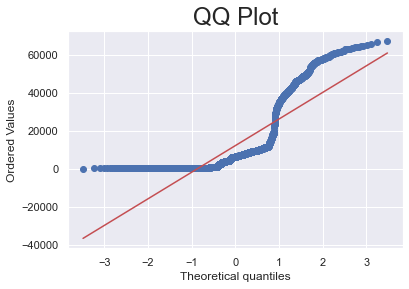

In [11]:
scipy.stats.probplot(btc_data.Close, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

There are far more zeros compare to theoretical normal distributioin. Therefore, the data does not follow a normal distribution.

### Setting the Desired Frequency

In [12]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'], dayfirst = True)
btc_data.set_index("Date", inplace = True)

In [13]:
btc_data

,Close,Adj Close,Volume
Date,,,
2014-09-17,457.334015,457.334015,21056800
2014-09-18,424.440002,424.440002,34483200
2014-09-19,394.795990,394.795990,37919700
2014-09-20,408.903992,408.903992,36863600
2014-09-21,398.821014,398.821014,26580100
...,...,...,...
2022-05-16,29862.917969,29862.917969,32613897286
2022-05-17,30425.857422,30425.857422,29101473475
2022-05-18,28720.271484,28720.271484,31285268319


In [14]:
btc_data_daily=btc_data.asfreq('d')

In [15]:
btc_data_daily

,Close,Adj Close,Volume
Date,,,
2014-09-17,457.334015,457.334015,21056800
2014-09-18,424.440002,424.440002,34483200
2014-09-19,394.795990,394.795990,37919700
2014-09-20,408.903992,408.903992,36863600
2014-09-21,398.821014,398.821014,26580100
...,...,...,...
2022-05-16,29862.917969,29862.917969,32613897286
2022-05-17,30425.857422,30425.857422,29101473475
2022-05-18,28720.271484,28720.271484,31285268319


### Splitting the Data

In [16]:
size = int(len(btc_data)*0.8)
df_train = btc_data.iloc[:size]
df_test = btc_data.iloc[size:]
df_train.tail()

,Close,Adj Close,Volume
Date,,,
2020-11-01,13737.109375,13737.109375,24453857900
2020-11-02,13550.489258,13550.489258,30771455468
2020-11-03,13950.300781,13950.300781,29869951617
2020-11-04,14133.707031,14133.707031,35116364962
2020-11-05,15579.848633,15579.848633,40856321439


In [17]:
df_test.head()

,Close,Adj Close,Volume
Date,,,
2020-11-06,15565.880859,15565.880859,39837841971
2020-11-07,14833.753906,14833.753906,35024953706
2020-11-08,15479.567383,15479.567383,26632075029
2020-11-09,15332.315430,15332.315430,34149115566
2020-11-10,15290.902344,15290.902344,25574938143


### White Noise

In [18]:
warnings.filterwarnings('ignore')

In [19]:
wn = np.random.normal(loc = df_train.Close.mean(), scale = df_train.Close.std(), size = len(df_train))
df_train['wn'] = wn
df_train.describe()

,Close,Adj Close,Volume,wn
count,2242.000000,2242.000000,2.242000e+03,2242.000000
mean,4562.942604,4562.942604,8.554016e+09,4692.661237
std,4236.119940,4236.119940,1.237326e+10,4214.028046
min,178.102997,178.102997,5.914570e+06,-9262.686722
25%,437.709740,437.709740,6.084652e+07,1894.686227
50%,3744.325561,3744.325561,2.404270e+09,4675.329580
75%,8192.408203,8192.408203,1.408235e+10,7558.699260
max,19497.400391,19497.400391,7.415677e+10,18920.913068


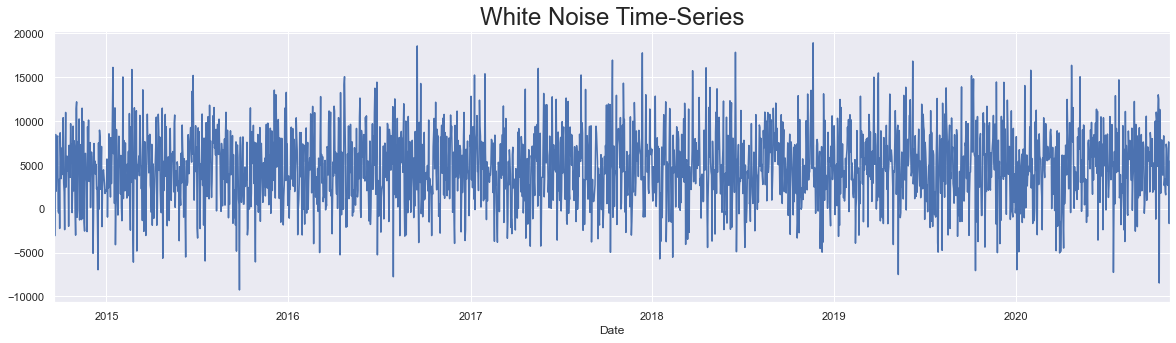

In [20]:
df_train.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

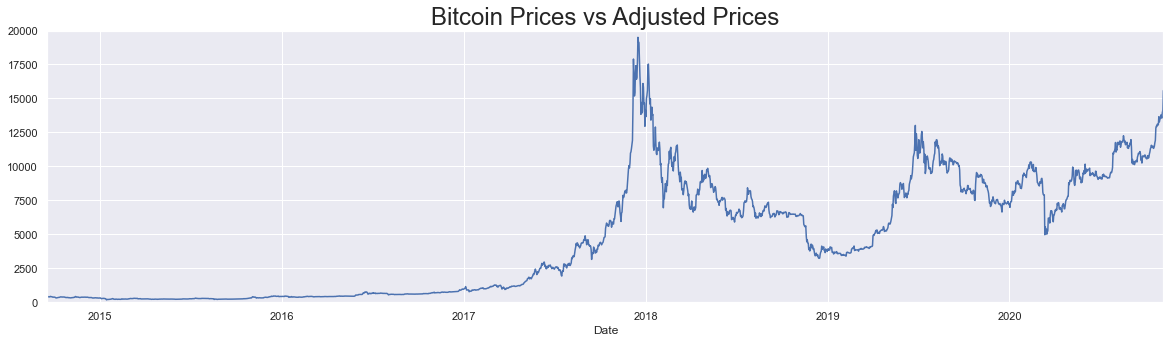

In [33]:
df_train.Close.plot(figsize=(20,5))
plt.title("Bitcoin Prices vs Adjusted Prices", size = 24)
plt.ylim(0,20000)
plt.show()

### Stationarity

In [22]:
df_train = df_train.astype('float32')

In [23]:
import sys
print (sys.version)

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]


In [28]:
sts.adfuller(df_train.Close)

(-0.8667467915641761,
 0.798725889758308,
 27,
 2214,
 {'1%': -3.4333070451478593,
  '5%': -2.862846332675802,
  '10%': -2.5674654240037733},
 31288.783497628774)

Non stationary

### Seasonality


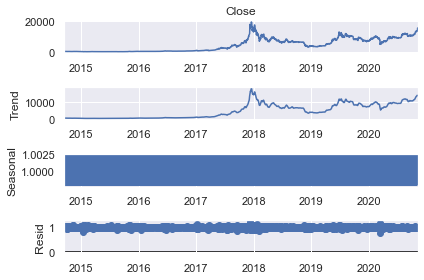

In [34]:
s_dec_multiplicative = seasonal_decompose(df_train.Close, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF


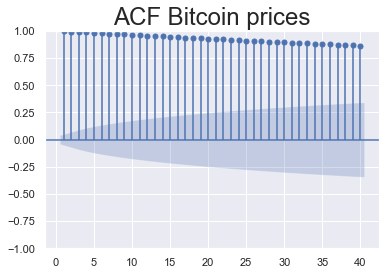

In [35]:
sgt.plot_acf(df_train.Close, lags = 40, zero = False)
plt.title("ACF Bitcoin prices", size = 24)
plt.show()

### PACF

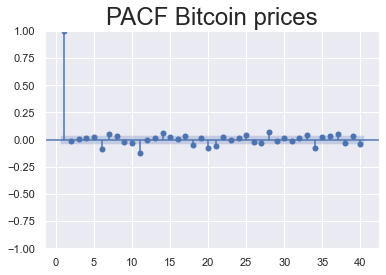

In [36]:
sgt.plot_pacf(df_train.Close, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Bitcoin prices", size = 24)
plt.show()